## Import the Data

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = "C:/Users/Matthew/Desktop/Projects\PulsarClassifier\predicting-a-pulsar-star\pulsar_stars.csv"
data = pd.read_csv(filename)
df = pd.DataFrame(data)



## Check for Null Values in Dataset

In [15]:
df.isnull().sum() # no null values = clean dataset

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

## Exploring the Dataset

In [114]:
print(df.shape) # 17898 rows of data, 9 features
print(df.columns)

# shuffle rows in df to get distributed sample when displaying top rows
df = df.reindex(np.random.permutation(df.index))
df.head(10)

(17898, 8)
Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
13701,112.507812,49.044941,0.222267,-0.159140,3.005853,22.182222,7.932847,64.977332
6716,128.687500,52.229175,0.077893,-0.310633,0.686455,8.561182,23.378431,657.322459
2733,121.203125,41.781679,0.260015,0.240895,4.461538,23.399812,6.669520,49.368631
13773,113.367188,48.508194,0.310149,0.118750,1.392977,14.065997,12.021096,161.274327
17355,99.460938,47.874005,0.527090,0.277989,1.084448,12.595072,14.953690,251.232721
15016,109.375000,48.213231,0.109977,-0.082933,2.199833,13.840505,9.668791,126.300260
3286,117.078125,47.294722,0.344813,0.350450,2.959030,20.955140,7.885172,66.235556
10925,127.765625,53.132865,0.121561,-0.253444,3.423077,20.691473,6.899169,52.478374
25,112.718750,50.301270,0.279391,-0.129011,8.281773,37.810012,4.691827,21.276210
15106,144.234375,46.002630,-0.211427,0.116341,1.217391,12.911762,14.150149,226.015479


#### Visualizations of Distributions

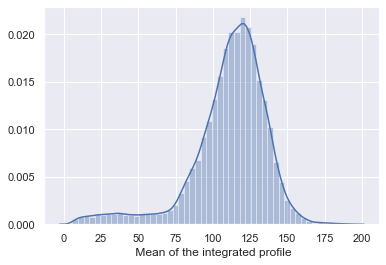

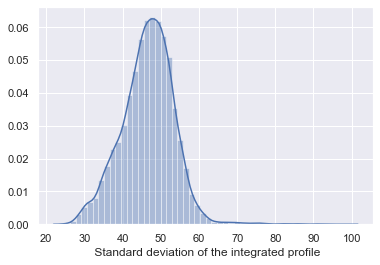

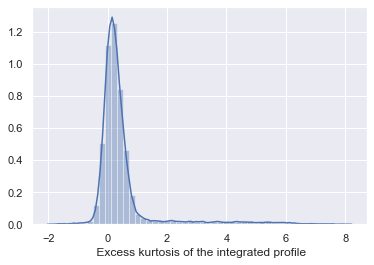

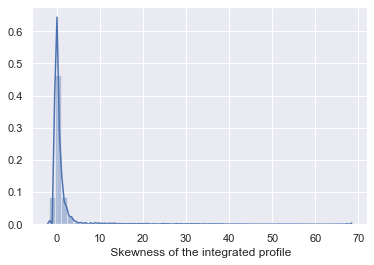

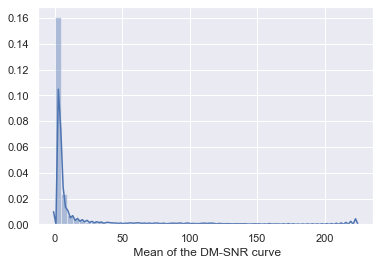

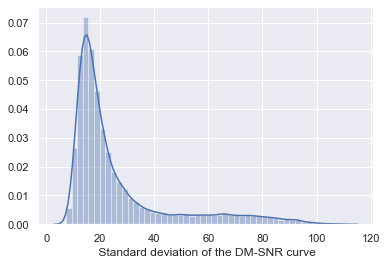

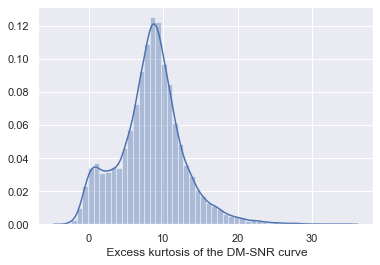

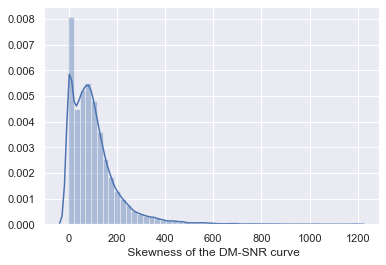

In [115]:
sns.set(color_codes = True)

for feature in df.columns:
    sns.distplot(df[feature])
    plt.show()

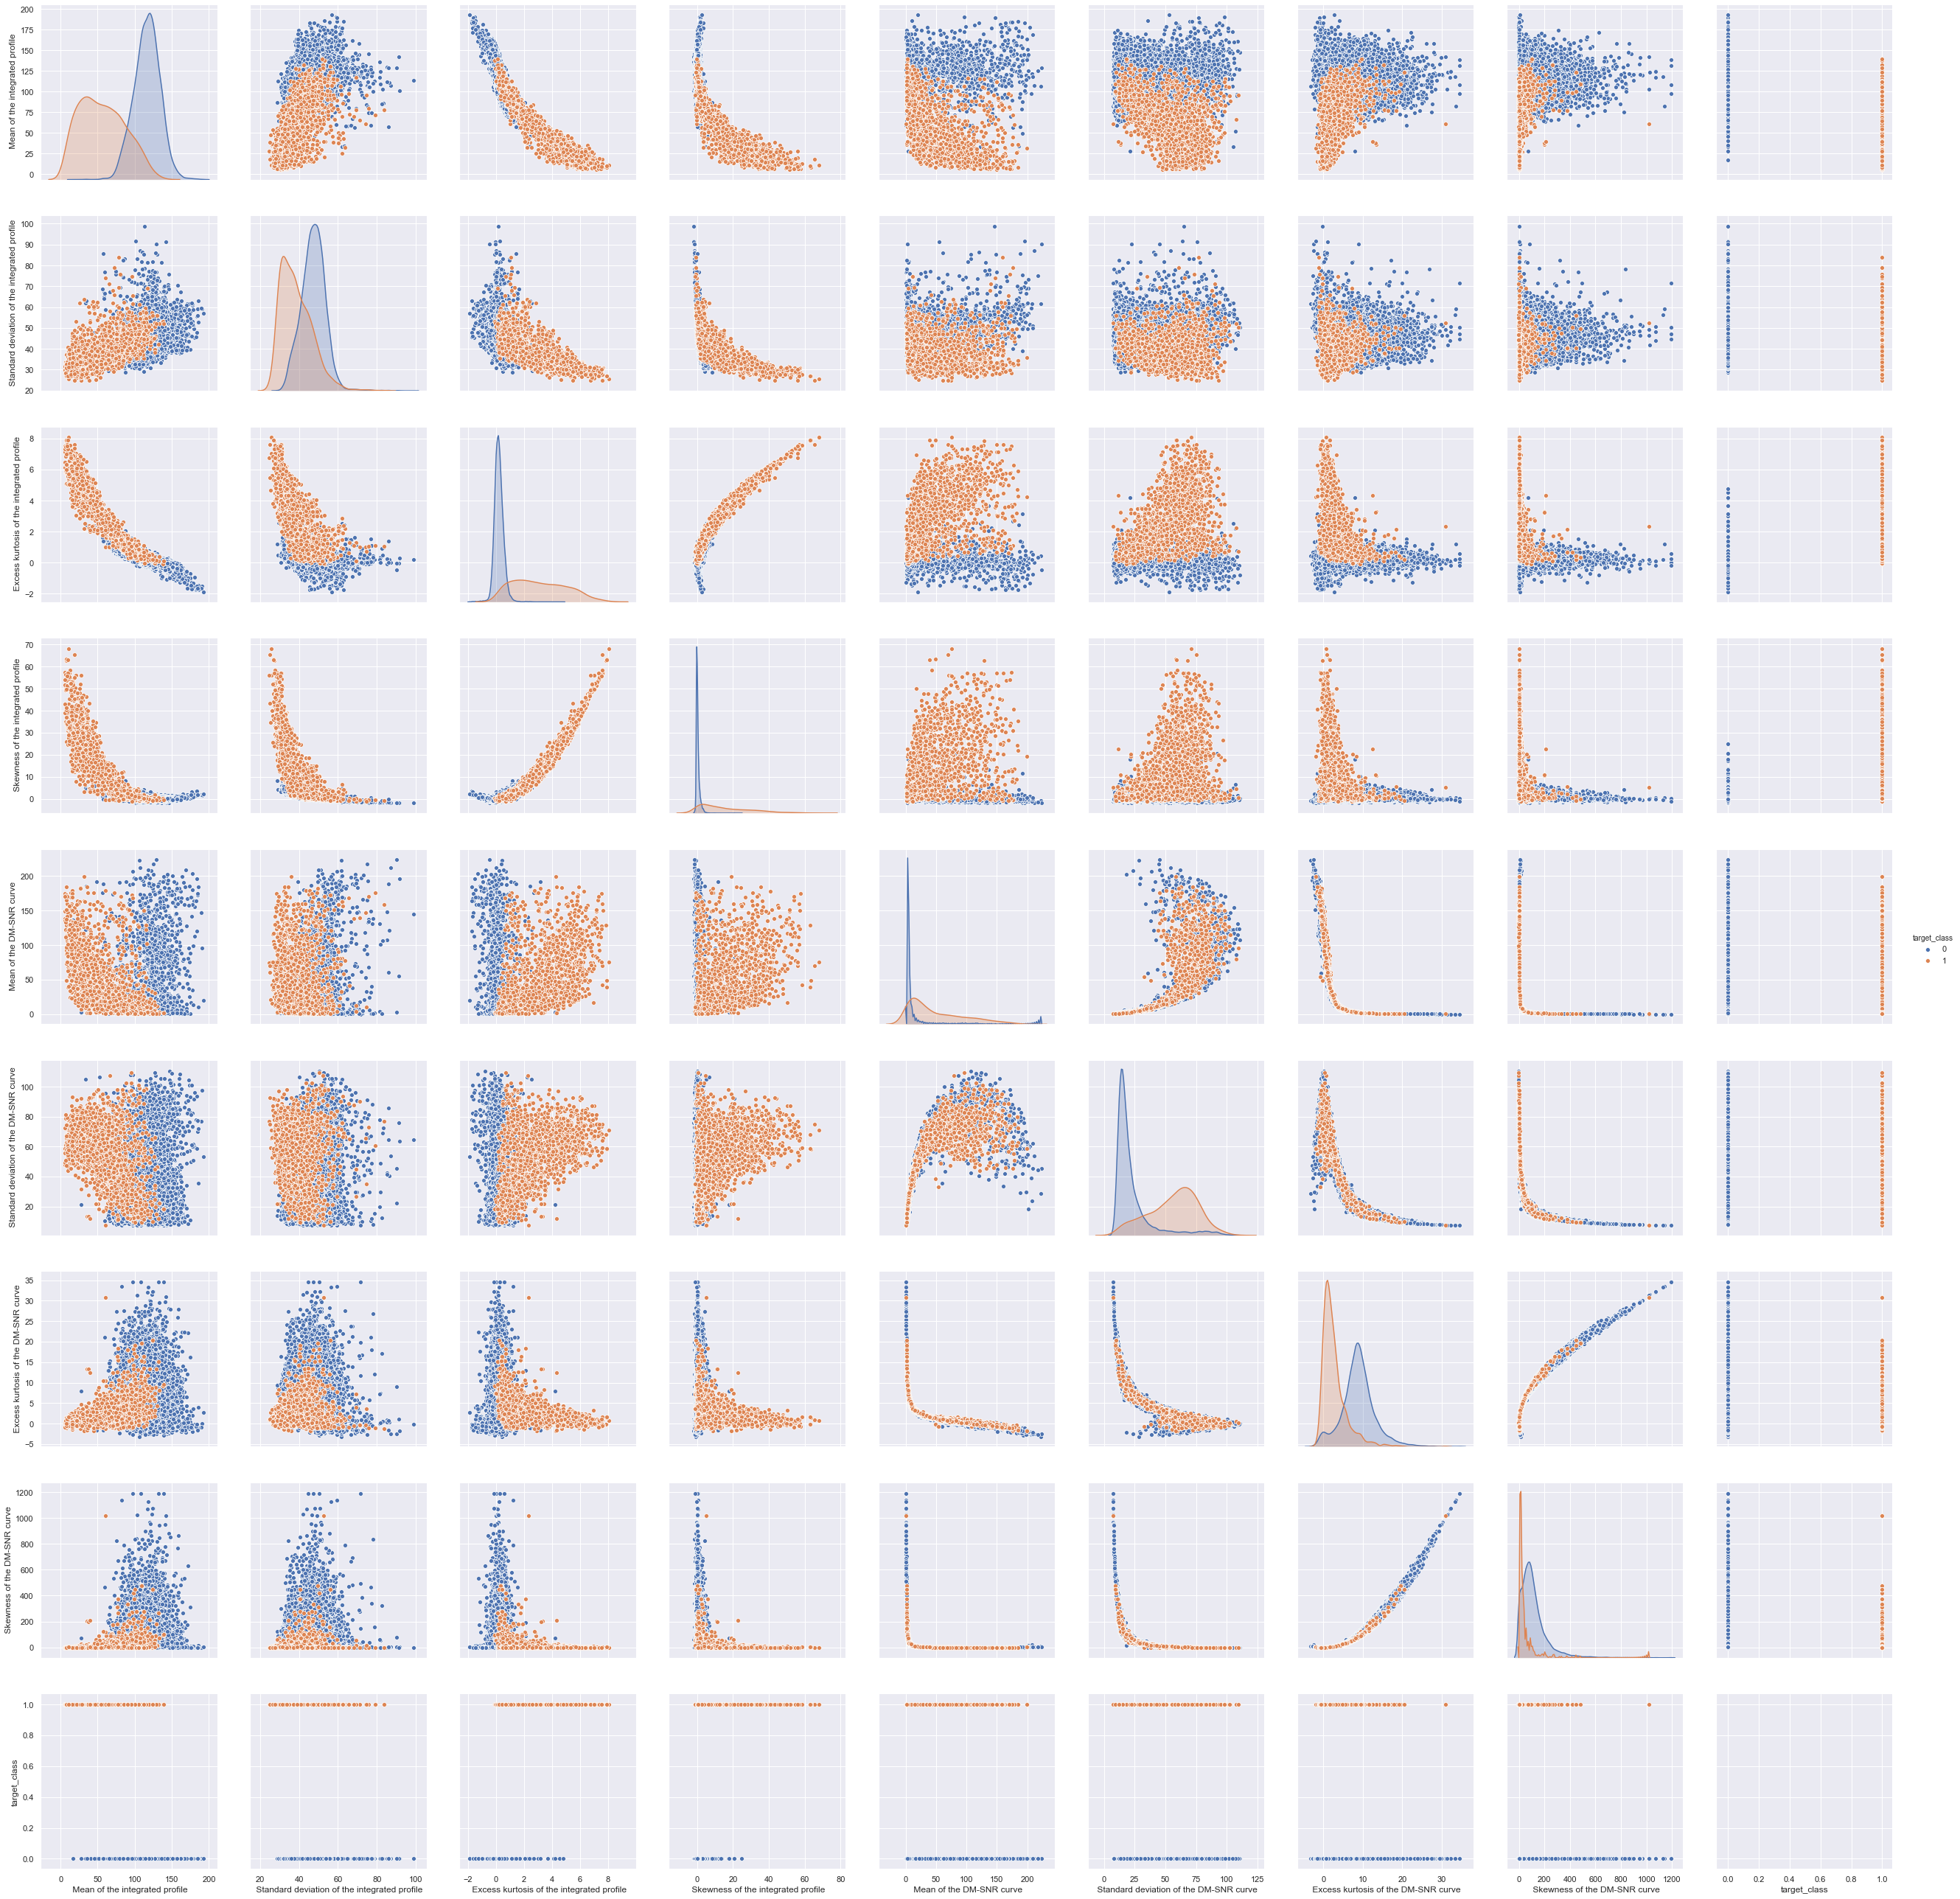

In [130]:
sns.pairplot(data, hue='target_class', height = 4)

## Check Correlation of Features to the Target using Pearson's Correlation Coefficient

In [20]:
for f in df.columns:
    related = df['target_class'].corr(df[f])
    print("%s: %f" % (f,related))

 Mean of the integrated profile: -0.673181
 Standard deviation of the integrated profile: -0.363708
 Excess kurtosis of the integrated profile: 0.791591
 Skewness of the integrated profile: 0.709528
 Mean of the DM-SNR curve: 0.400876
 Standard deviation of the DM-SNR curve: 0.491535
 Excess kurtosis of the DM-SNR curve: -0.390816
 Skewness of the DM-SNR curve: -0.259117
target_class: 1.000000


#### Visualizing Correlations

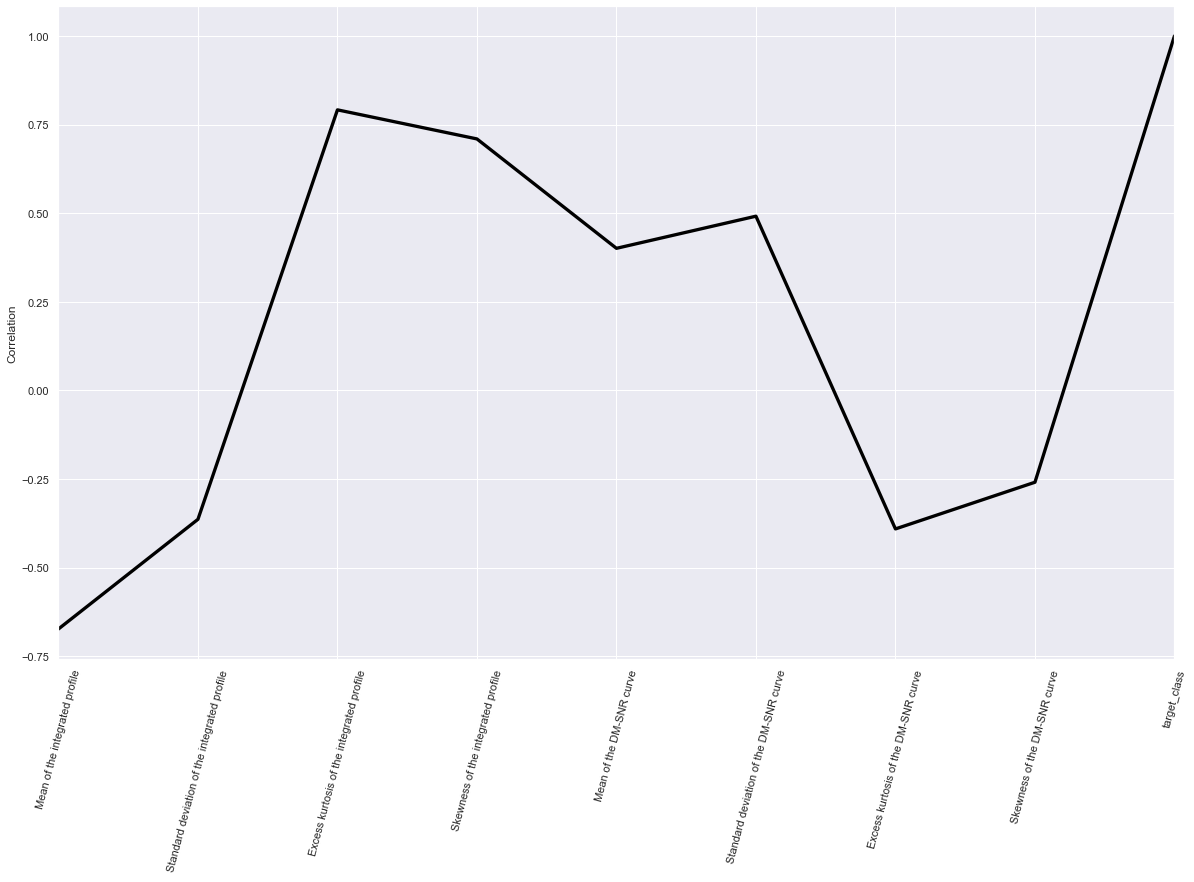

In [22]:
import matplotlib.pyplot as plt

correlations = [df['target_class'].corr(df[f]) for f in df.columns]
len(df.columns), len(correlations) # ensure number of selected features and correlations calculated are the same

# plots a dataframe with feature names
def plot_dataframe(df, y_label):  
    color='black'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75);
    plt.show()
    
# create second dataframe using features and correlations
df2 = pd.DataFrame({'attributes': df.columns, 'correlation': correlations})

# plot above dataframe
plot_dataframe(df2, 'Correlation')

## Logistic Regression

In [47]:
from sklearn import linear_model

logistic_regression = linear_model.LogisticRegression(solver='liblinear')

# features
x = df.get(list(df.columns)) 
x.drop(columns='target_class', axis=1, inplace=True)
print(x)

# target
y = df.get(['target_class'])

        Mean of the integrated profile  \
12770                        65.070312   
2459                        114.039062   
15097                       129.585938   
7637                         57.765625   
10919                       101.773438   
13266                       122.546875   
16588                       152.117188   
15217                       111.835938   
7908                         97.203125   
3780                        114.750000   
1577                         99.835938   
1718                         98.789062   
13873                        91.382812   
10018                       114.429688   
11773                       113.601562   
13254                       144.226562   
4142                         98.179688   
16612                        99.570312   
3892                         60.148438   
1724                        143.757812   
3171                        121.992188   
11357                       118.265625   
15790                       101.48

In [48]:
from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(  
    x,                         # features  
    y,                         # labels     
    test_size = 0.25,          # split ratio   
    random_state = 1,          # set random seed      
    stratify = y)              # randomize based on labels

In [50]:
x = train_set.iloc[:,0:8]
y = np.ravel(train_labels)

# train the model
logistic_regression.fit(X = x, y = y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Make Predictions

In [51]:
print(logistic_regression.predict_proba([[90.9,42.8,0.51,1.16,4.3,20.1,5.9,42.1]]))
print(logistic_regression.predict([[119.156250,50.605619,0.464655,-0.043930,18.352843,52.719497,2.727910,6.063608]]))

[[0.96232701 0.03767299]]
[0]


In [52]:
# covert predicted probabilities into a dataframe
preds_prob = pd.DataFrame(logistic_regression.predict_proba(X=test_set))

# assign column names to prediction
preds_prob.columns = ["Pulsar", "Not Pulsar"]
 
# get the predicted class labels
preds = logistic_regression.predict(X=test_set) 
preds_class = pd.DataFrame(preds) 
preds_class.columns = ["Prediction"]

# actual prediction
original_result = pd.DataFrame(test_labels) 
original_result.columns = ["Original Result"]

preds_prob.reset_index(drop=True, inplace=True)
preds_class.reset_index(drop=True, inplace=True)
original_result.reset_index(drop=True, inplace=True)
 
#---merge the three dataframes into one--
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head(30))

      Pulsar  Not Pulsar  Prediction  Original Result
0   0.976632    0.023368           0                0
1   0.987323    0.012677           0                0
2   0.988535    0.011465           0                0
3   0.965986    0.034014           0                0
4   0.996432    0.003568           0                0
5   0.997345    0.002655           0                0
6   0.992340    0.007660           0                0
7   0.999357    0.000643           0                0
8   0.999112    0.000888           0                0
9   0.992592    0.007408           0                0
10  0.999627    0.000373           0                0
11  0.991356    0.008644           0                0
12  0.000725    0.999275           1                1
13  0.995024    0.004976           0                0
14  0.974159    0.025841           0                0
15  0.949046    0.050954           0                0
16  0.992796    0.007204           0                0
17  0.912510    0.087490    

### Confusion Matrix

TN:  4042
FP:  23
FN:  62
TP:  348


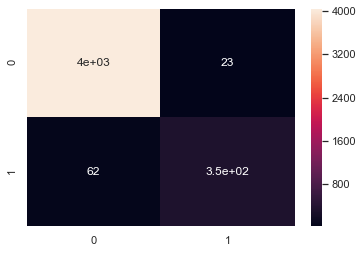

In [53]:
from sklearn import metrics

tn, fp, fn, tp = metrics.confusion_matrix(y_true = test_labels, y_pred = preds).ravel()

print("TN: ", tn)
print("FP: ", fp)
print("FN: ", fn)
print("TP: ", tp)

# visually plot using seaborn
sns.heatmap(metrics.confusion_matrix(y_true = test_labels, y_pred = preds), annot = True)

### Compute Accuracy, Precision, and Recall

In [54]:
## -- ACCURACY -- ##
# Fraction of predictions model got right
accuracy = ((tp + tn) / (tp + tn + fp + fn))
print("ACCURACY: ", accuracy)

## -- PRECISION -- ##
# Number of correct positive predictions - "Of those predicted, how many were actually predicted correctly" 
precision = tp / (tp + fp)
print("PRECISION: ", precision)

## -- RECALL -- ##
# Ability of classifier to find all positive samples
recall = tp / (tp + fn)
print("RECALL: ", recall)

# A classification report can also be made simply using sklearn. This will later be used to compare this model to other models
log_reg_cr = metrics.classification_report(y_true = test_labels, y_pred = preds)

ACCURACY:  0.9810055865921787
PRECISION:  0.9380053908355795
RECALL:  0.848780487804878


### F1 Score & False Positive Rate

In [55]:
f1_score = (2 * (precision * recall)) / (precision + recall)
print("F1 Score: ", f1_score)

fpr = fp / (fp + tn)
print("False Positive Rate: ", fpr)

F1 Score:  0.8911651728553137
False Positive Rate:  0.005658056580565805


## KNN

1 0.966
2 0.973
3 0.973
4 0.975
5 0.974
6 0.974
7 0.975
8 0.975
9 0.976
10 0.975
11 0.976
12 0.976
13 0.976
14 0.975
15 0.976


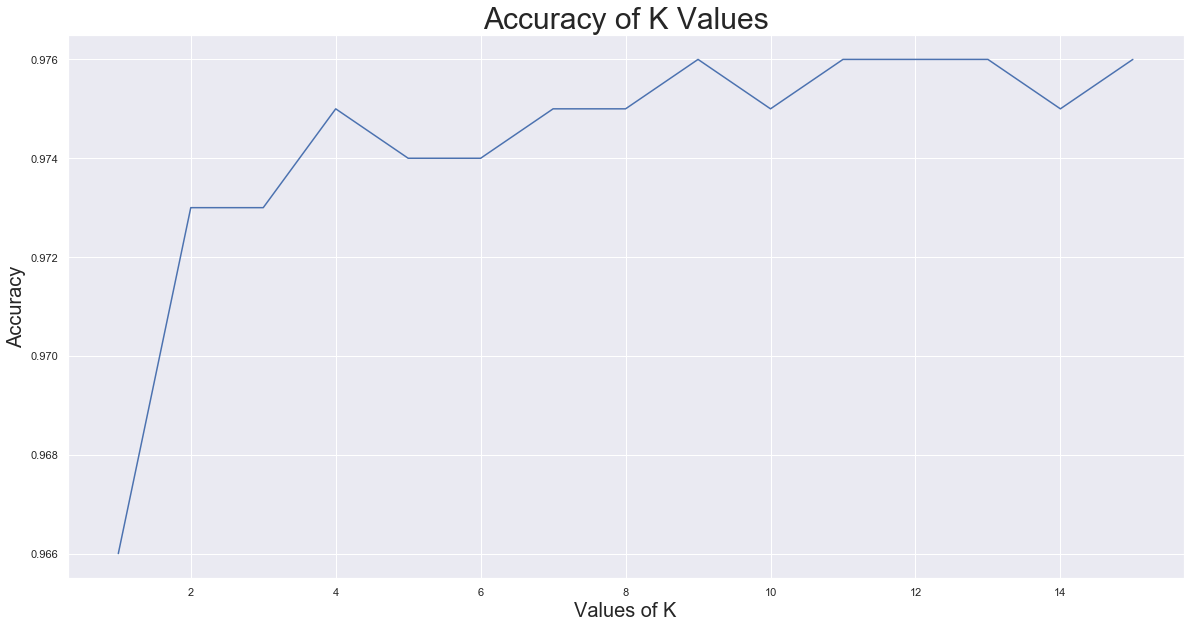

In [93]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
k_values = []

for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X = x, y = y)
    
    scores.append(round(knn.score(test_set,test_labels),3))
    k_values.append(k)
    
    print(k, scores[k-1])
    
plt.subplots(figsize=(20,10))
plt.plot(k_values, scores)

plt.xlabel('Values of K', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Accuracy of K Values', fontsize=30)
plt.show()


0.9740782122905028


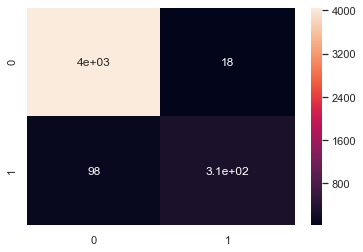

In [75]:
preds = knn.predict(X=test_set) 
knn_cr = metrics.classification_report(y_true = test_labels, y_pred = preds)
print(metrics.accuracy_score(test_labels, y_pred = preds))
sns.heatmap(metrics.confusion_matrix(y_true = test_labels, y_pred = preds), annot = True)

In [80]:
from sklearn.model_selection import cross_val_score

cv_scores = []

folds = 5
ks = list(range(1,int(len(x) * ((folds - 1)/folds))))
ks = [k for k in ks if k % 3 != 0]

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean)

1 0.9599932813750416
2 0.970051201752395
4 0.97198810914434
5 0.9721372515132523
7 0.9729568959952692
8 0.9720626525658831
10 0.972137084935774
11 0.9721369183582956
13 0.9719135101969709
14 0.971764534405537
16 0.9719880536185139
17 0.9718391333529061
19 0.9719136767744493
20 0.9719136767744493
22 0.97183907782708
23 0.97198810914434
25 0.9716901020356461
26 0.9716155586141031
28 0.971466471771017
29 0.971615503088277
31 0.9712430080838661
32 0.9716155586141031
34 0.9715410151925601
35 0.9715410151925601
37 0.97169004650982
38 0.9715410707183862
40 0.9713920394011263
41 0.9716155586141031
43 0.9716899354581677
44 0.9717644233538847
46 0.9714664162451909
47 0.9713918728236479
49 0.9716154475624508
50 0.9716154475624508
52 0.9716899354581677
53 0.9718389112496016
55 0.9717644233538847
56 0.9718389112496016
58 0.9719879425668617
59 0.9717643678280586
61 0.9718389112496016
62 0.9719134546711448
64 0.971764478879711
65 0.9715409596667339
67 0.9713919838753
68 0.9713919838753
70 0.971689990

KeyboardInterrupt: 

## SVM

## Comparing Different Algorithms

In [92]:
print('Logistic Regression Classification Report: \n',log_reg_cr)
print('KNN Classification Report: \n', knn_cr)

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4065
           1       0.94      0.85      0.89       410

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4065
           1       0.95      0.76      0.84       410

    accuracy                           0.97      4475
   macro avg       0.96      0.88      0.91      4475
weighted avg       0.97      0.97      0.97      4475

